In [48]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
# Replace 'your_dataset.csv' with the actual file path or URL of your dataset
data = pd.read_csv(r'C:\Users\bivin\OneDrive\Desktop\Regrerssion_energy_production_data.csv',sep=';')
data


,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [3]:
#display the first few rows from the data set
print(data.head())



   temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0         9.59           38.56       1017.01       60.10             481.30
1        12.04           42.34       1019.72       94.67             465.36
2        13.87           45.08       1024.42       81.69             465.48
3        13.72           54.30       1017.89       79.08             467.05
4        15.14           49.64       1023.78       75.00             463.58


In [4]:
# Display information about the dataset, including data types and non-null counts
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
None


In [5]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())



Missing Values:
temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64


In [6]:
data.dtypes

temperature          float64
exhaust_vacuum       float64
amb_pressure         float64
r_humidity           float64
energy_production    float64
dtype: object

In [7]:
# Check for duplicated rows
duplicated_rows = data[data.duplicated()]
print("Duplicated Rows:")
print(duplicated_rows)

Duplicated Rows:
      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
2066        10.72           41.17       1019.68       60.71             479.21
2780        28.41           75.60       1018.48       56.07             440.28
3333        24.79           75.60       1017.07       68.23             440.05
3467         7.64           41.17       1020.01       75.14             488.53
3550        25.42           75.60       1017.39       77.63             438.24
3747        11.61           41.17       1019.57       58.82             476.81
4292        12.27           41.17       1019.41       58.10             475.13
4528        24.63           59.57       1010.45       85.36             440.67
5065         8.57           41.17       1020.18       72.47             484.20
5564        11.82           41.17       1019.50       55.74             475.61
5812        25.21           75.60       1017.19       69.84             445.84
5975         7.87           41.17  

In [8]:
#Remove Duplicated Rows
data_new = data.drop_duplicates()
data_new

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


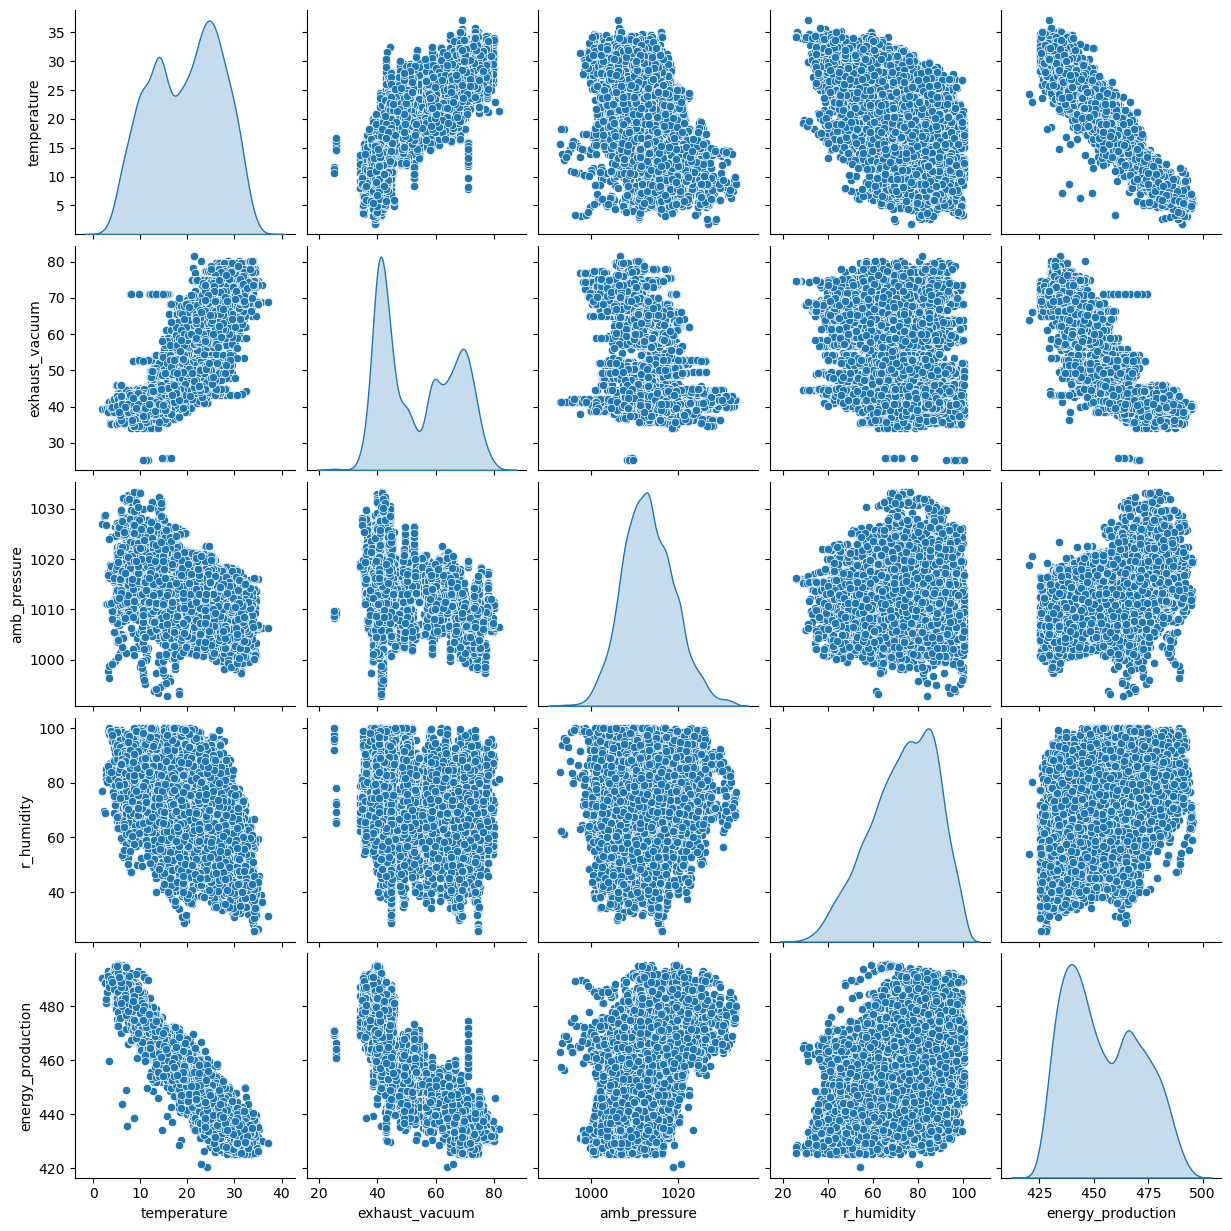

In [9]:
# Visualize data distributions and relationships
sns.pairplot(data_new,diag_kind="kde")
plt.show()

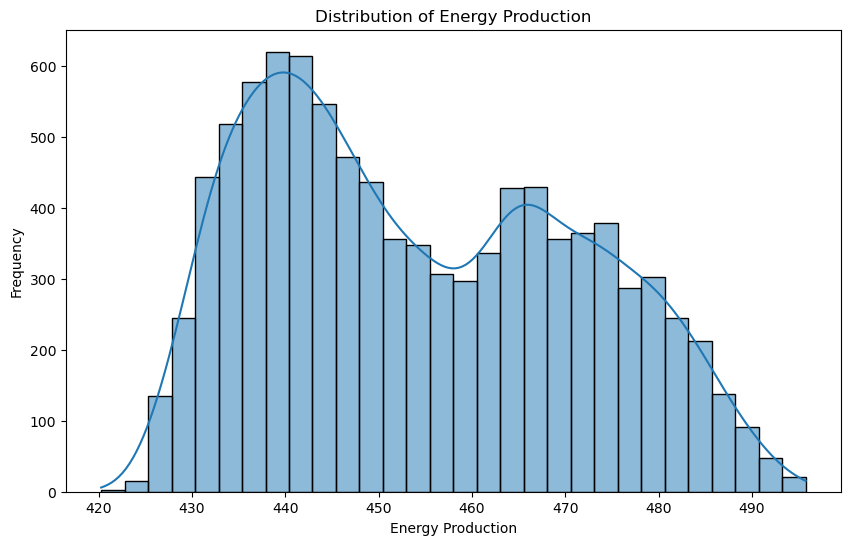

In [10]:
# Visualize the distribution of the target variable (energy_production)
plt.figure(figsize=(10, 6))
sns.histplot(data['energy_production'], bins=30, kde=True)
plt.title('Distribution of Energy Production')
plt.xlabel('Energy Production')
plt.ylabel('Frequency')
plt.show()



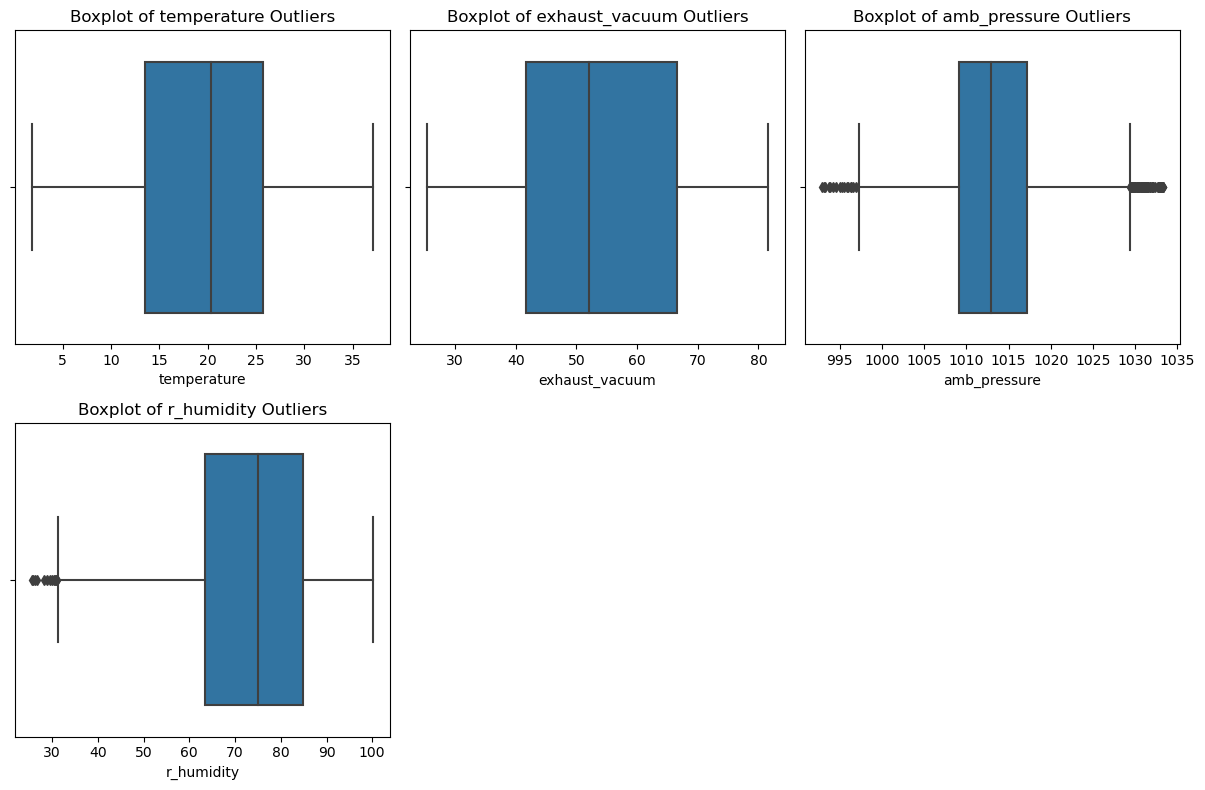

In [11]:
# Display the boxplot for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(data_new.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=data_new[col])
    plt.title(f'Boxplot of {col} Outliers')
plt.tight_layout()
plt.show()


In [12]:
# Identify and remove outliers for each numerical column
for col in data_new.columns[:-1]:  # Exclude the target variable
    q1 = data_new[col].quantile(0.25)
    q3 = data_new[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify and print outliers
    outliers = data_new[(data_new[col] < lower_bound) | (data_new[col] > upper_bound)]
    print(f"Outliers in {col}:")
    print(outliers)

    # Drop outliers from the DataFrame
    df = data_new.drop(outliers.index)

Outliers in temperature:
Empty DataFrame
Columns: [temperature, exhaust_vacuum, amb_pressure, r_humidity, energy_production]
Index: []
Outliers in exhaust_vacuum:
Empty DataFrame
Columns: [temperature, exhaust_vacuum, amb_pressure, r_humidity, energy_production]
Index: []
Outliers in amb_pressure:
      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
38           9.95           41.82       1033.09       69.44             477.52
175          9.06           41.92       1029.90       90.88             473.37
315         14.46           42.86       1031.34       69.84             464.44
319         14.58           41.92       1030.42       61.96             462.69
385         14.20           42.86       1031.96       69.59             468.63
...           ...             ...           ...         ...                ...
9093         9.42           41.40       1030.38       87.80             472.99
9125         7.66           41.92       1031.96       82.48          

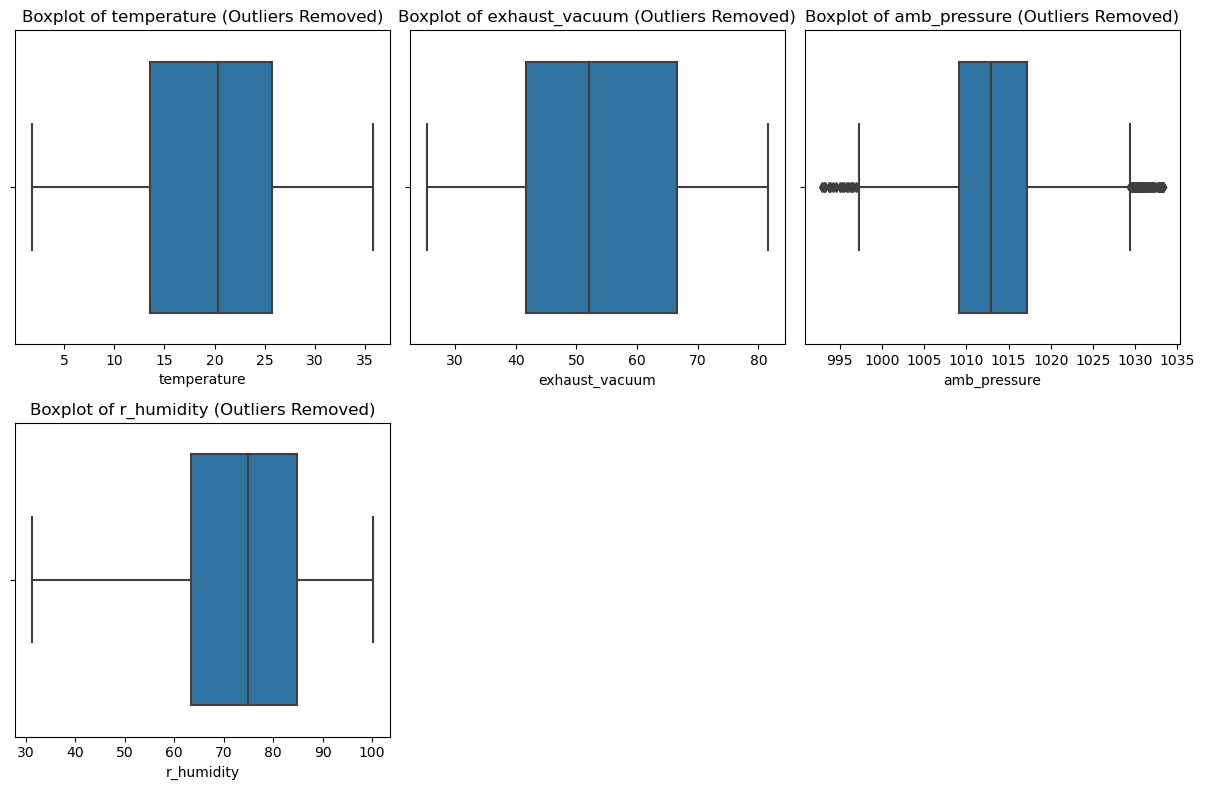

In [13]:
# Boxplot for each numerical column after removing outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (Outliers Removed)')
plt.tight_layout()
plt.show()

In [14]:
#due to the amb_pressure having higher values we should change the IQR Value according to it

In [15]:
'''deciding whether to delete or modify the outliers requires careful consideration
 our amb_pressure have 30% outliers so lets modify the data rather than the deleting
 because it may contains the valuable information '''

'deciding whether to delete or modify the outliers requires careful consideration\n our amb_pressure have 30% outliers so lets modify the data rather than the deleting\n because it may contains the valuable information '

In [16]:
# Calculate the IQR
iqr = np.percentile(df["amb_pressure"], 75) - np.percentile(df["amb_pressure"], 25)

# Define the threshold values
lower_bound = np.median(df["amb_pressure"]) - 1.5 * iqr
upper_bound = np.median(df["amb_pressure"]) + 1.5 * iqr

# Replace outliers with threshold values
df["amb_pressure"] = np.clip(df["amb_pressure"], lower_bound, upper_bound)

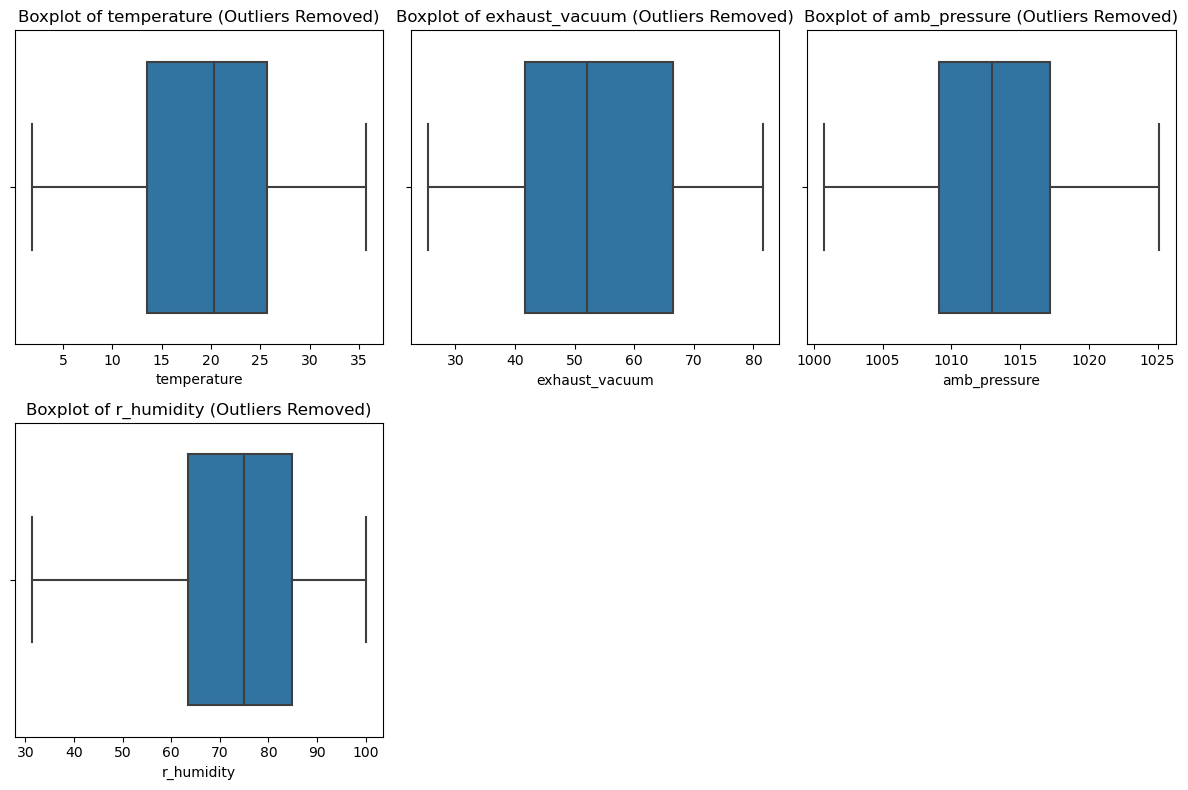

In [17]:
#lets again check the oultiers for our modified data
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (Outliers Removed)')
plt.tight_layout()
plt.show()

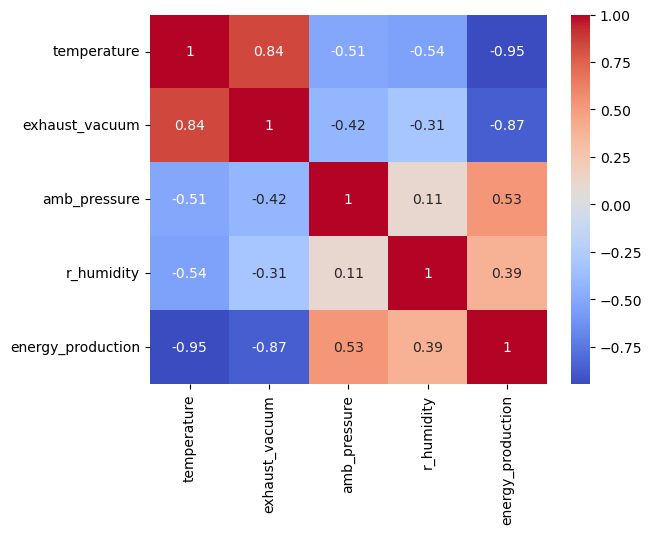

In [18]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

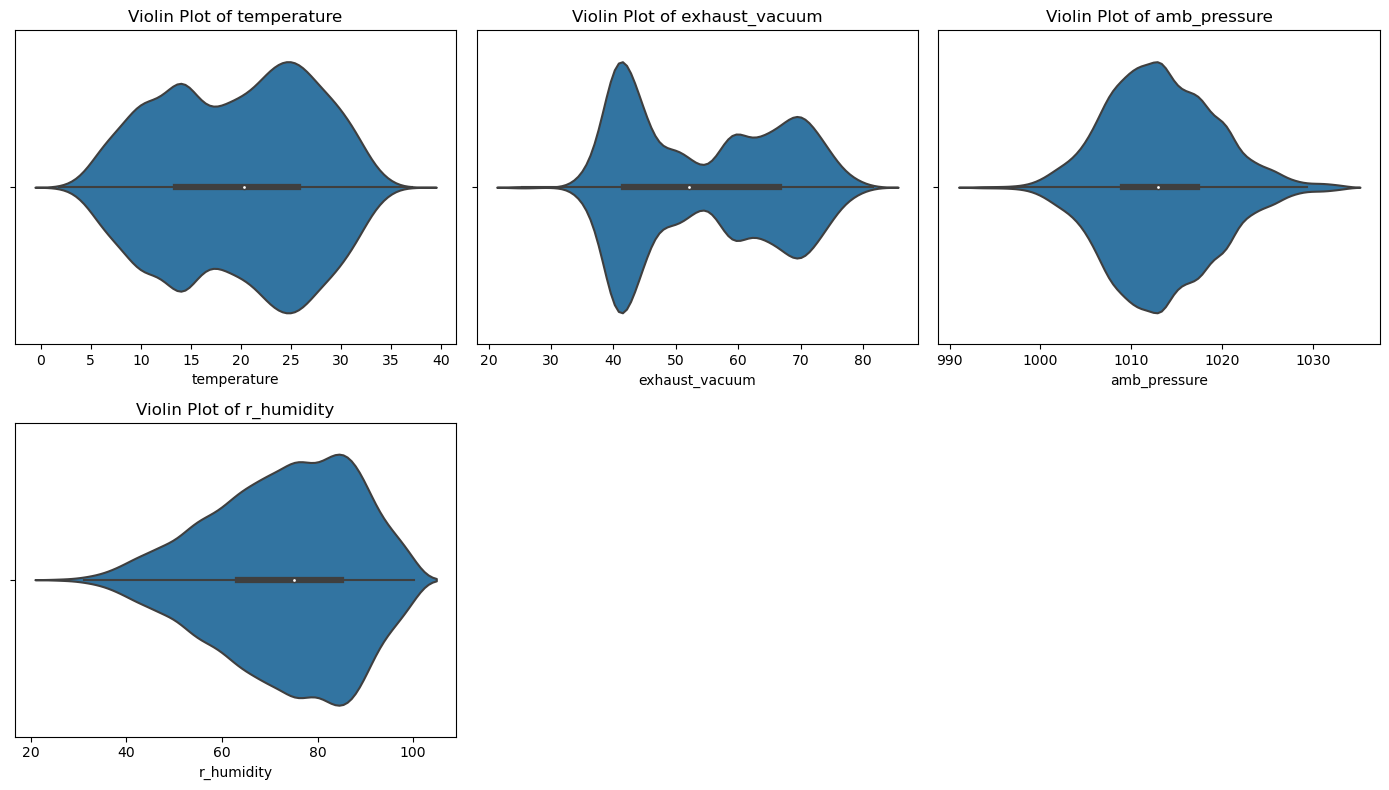

In [19]:
# Violin Plots
plt.figure(figsize=(14, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.violinplot(x=data[col])
    plt.title(f'Violin Plot of {col}')

plt.tight_layout()
plt.show()

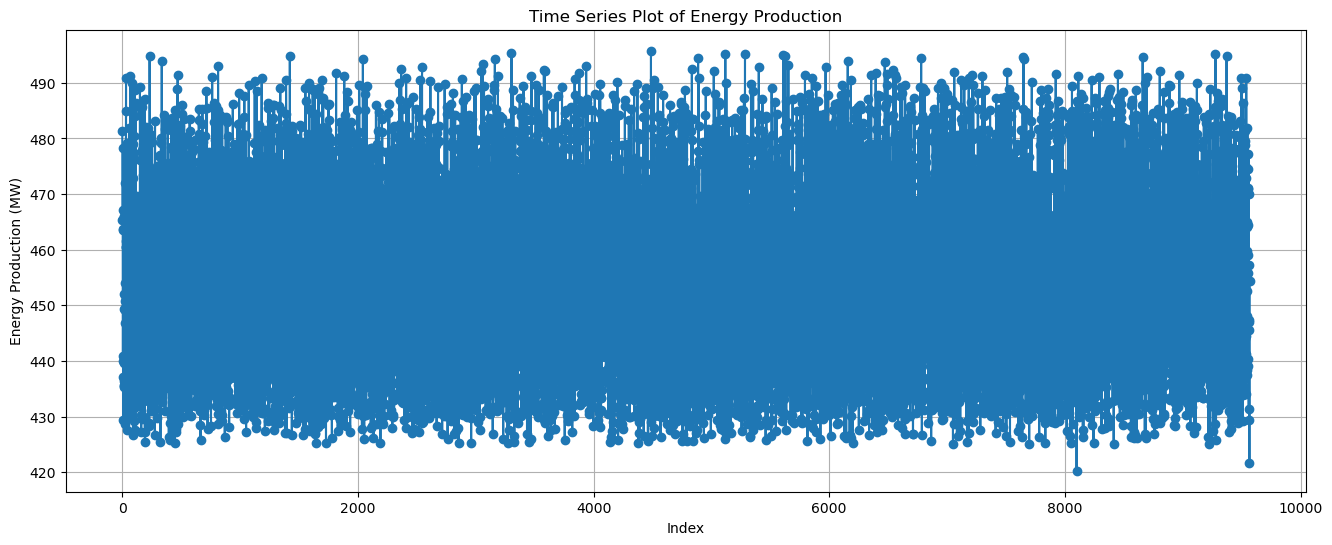

In [20]:
# Time Series Plot
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['energy_production'], marker='o', linestyle='-')
plt.title('Time Series Plot of Energy Production')
plt.xlabel('Index')
plt.ylabel('Energy Production (MW)')
plt.grid(True)
plt.show()

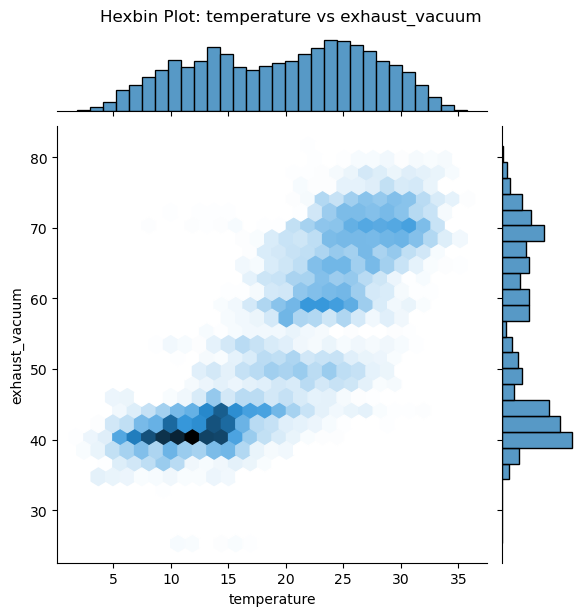

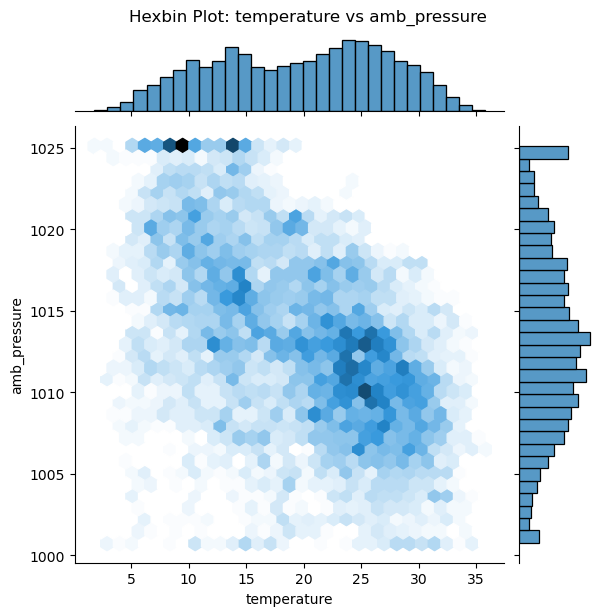

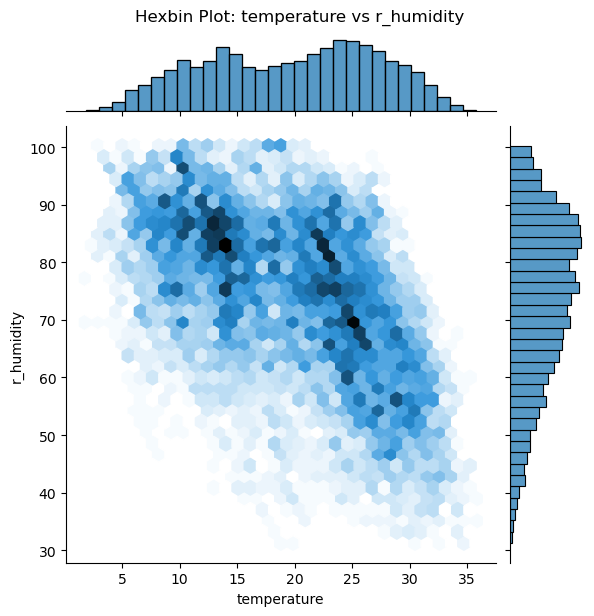

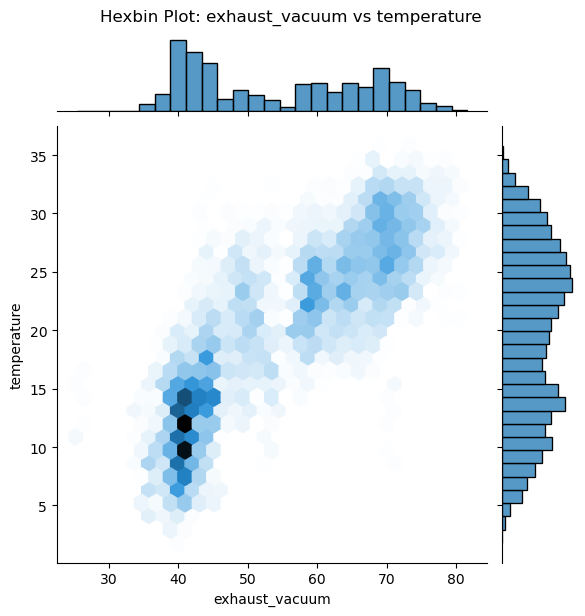

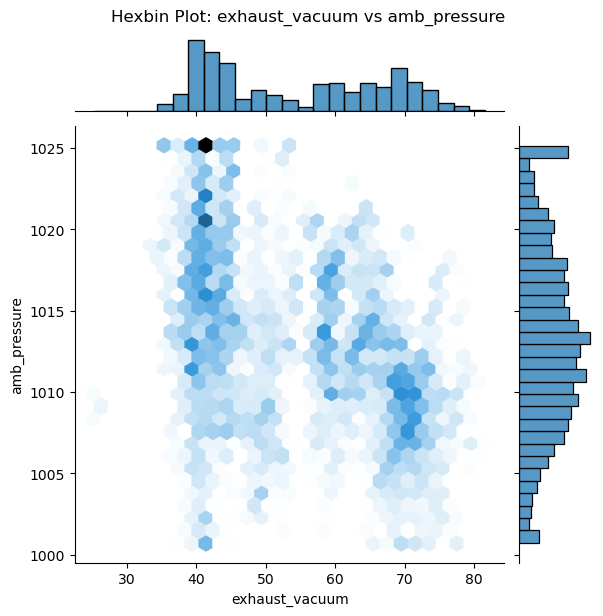

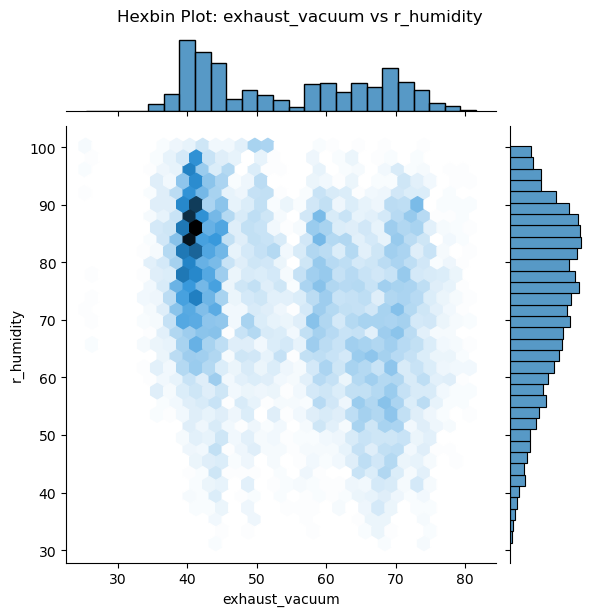

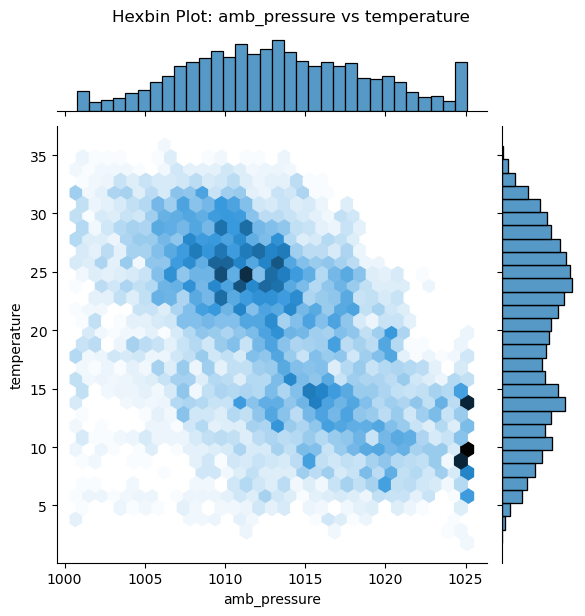

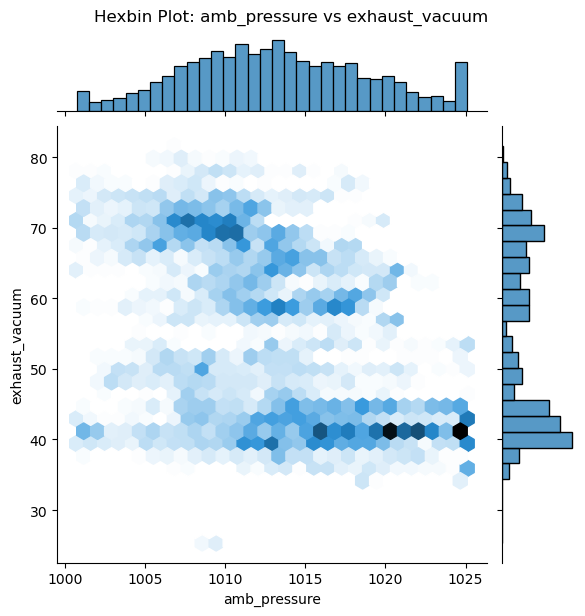

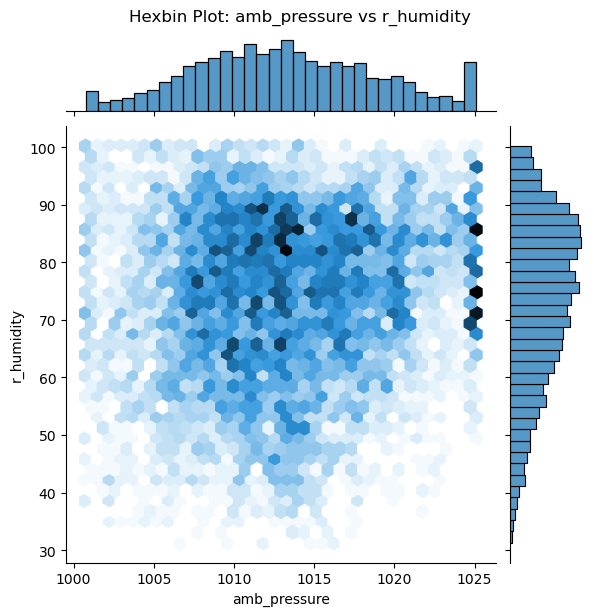

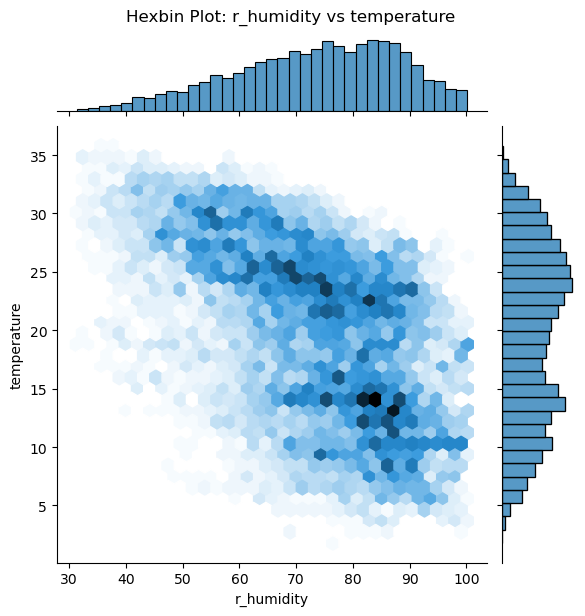

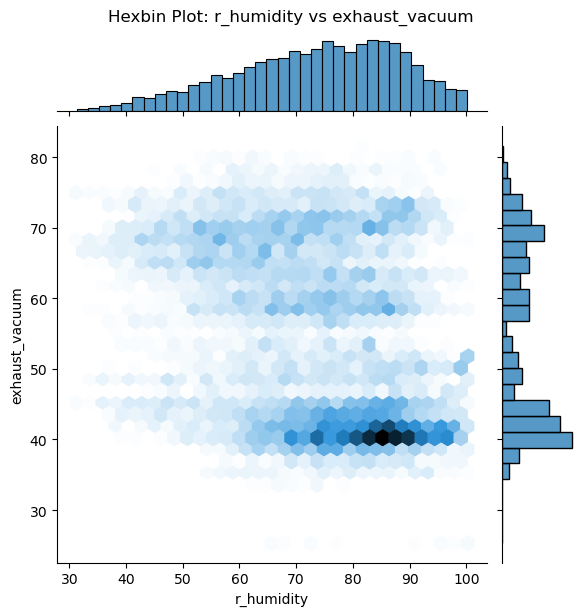

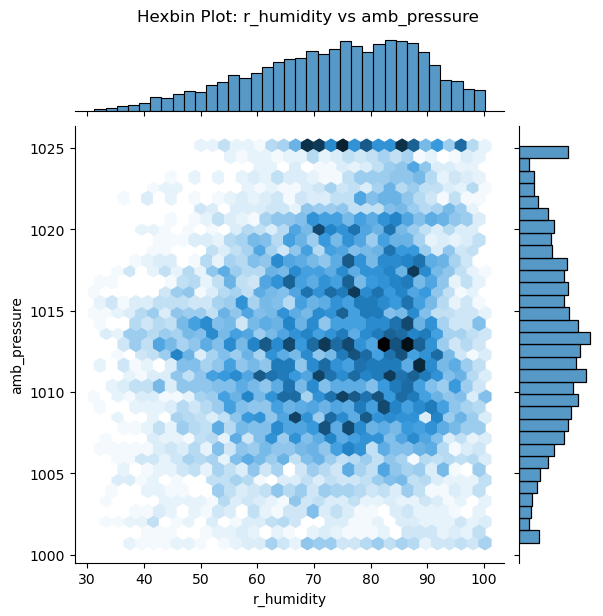

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (if not loaded already)
# data = pd.read_csv("your_dataset.csv")

# Hexbin Plots for all pairs of variables
for i, col1 in enumerate(df.columns[:-1]):
    for j, col2 in enumerate(df.columns[:-1]):
        if i != j:
            sns.jointplot(x=col1, y=col2, data=df, kind='hex')
            plt.suptitle(f"Hexbin Plot: {col1} vs {col2}", y=1.02)
            plt.show()


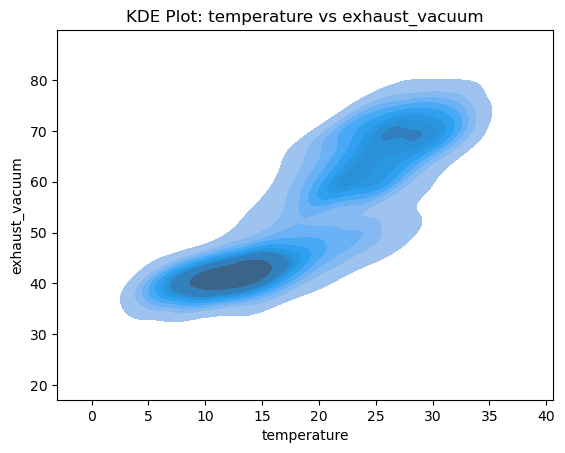

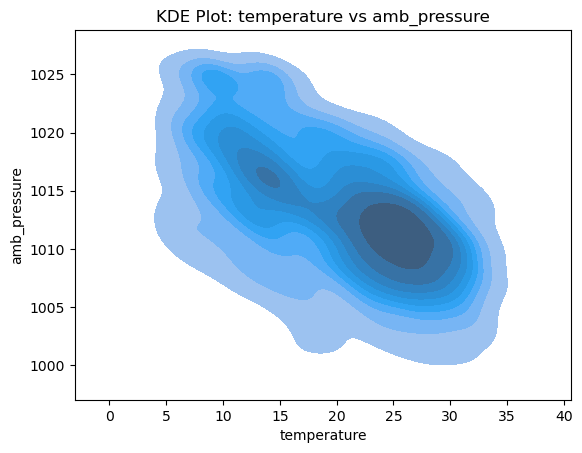

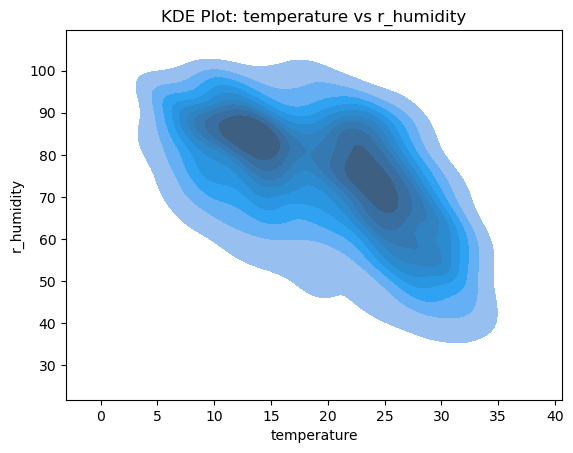

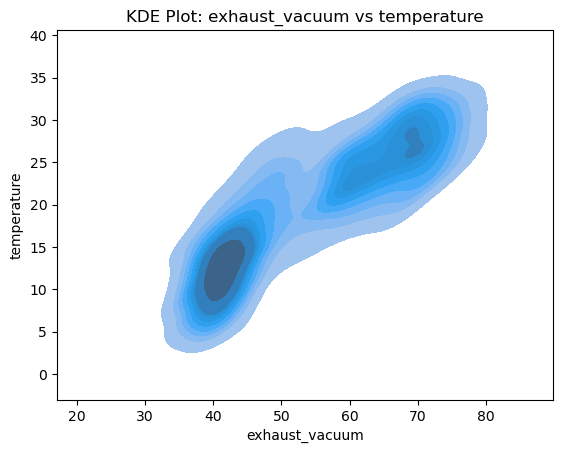

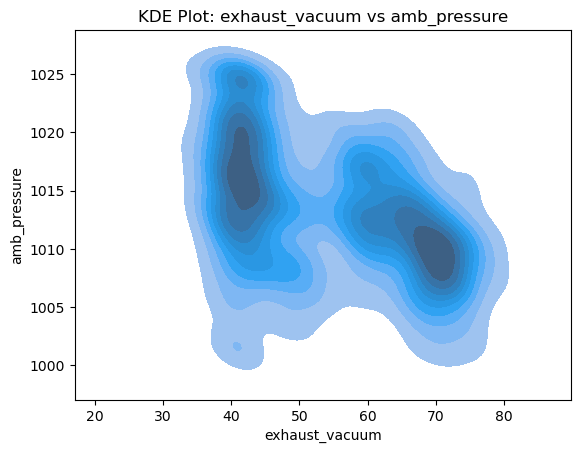

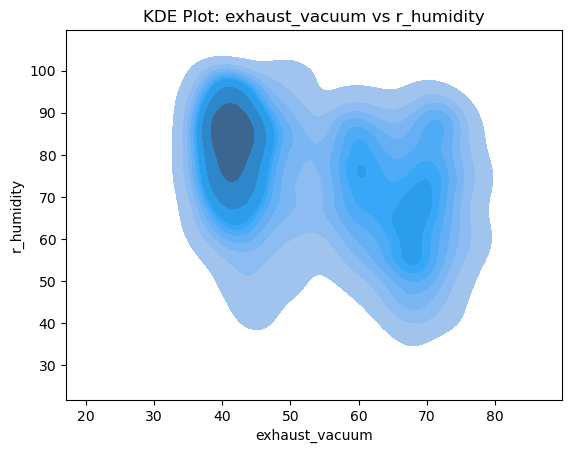

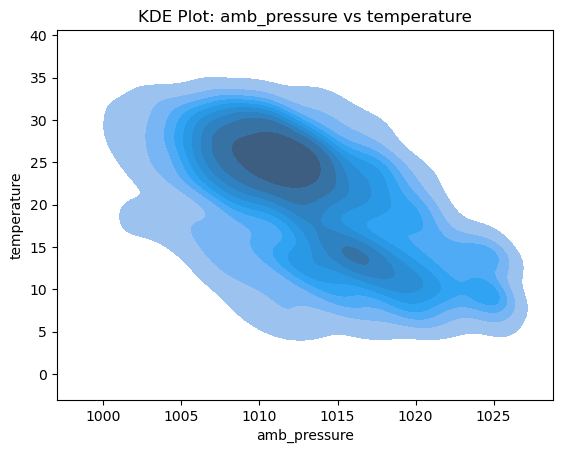

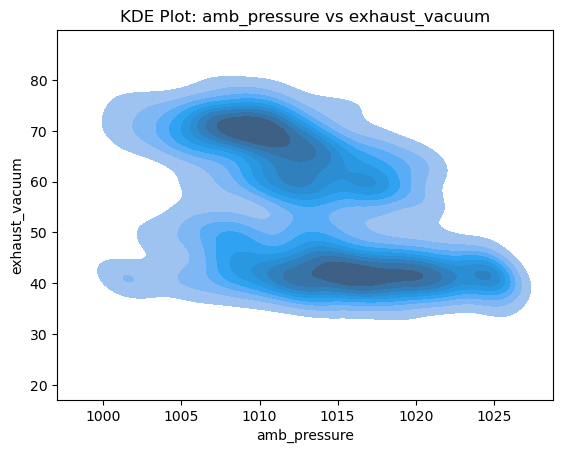

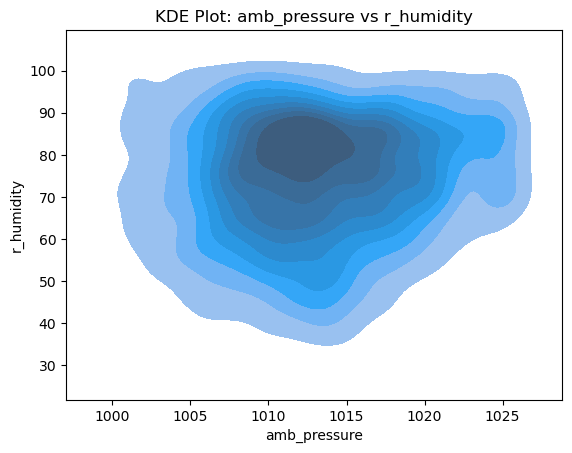

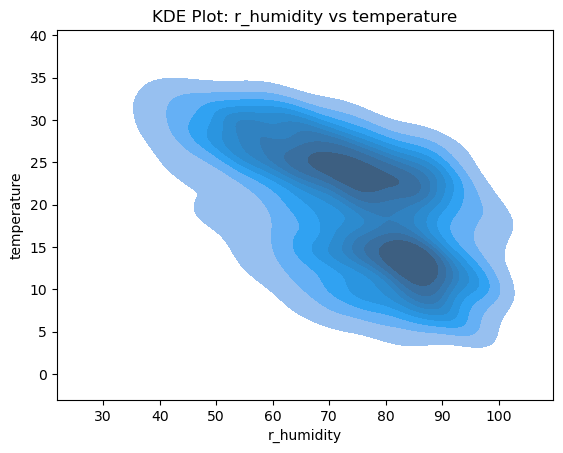

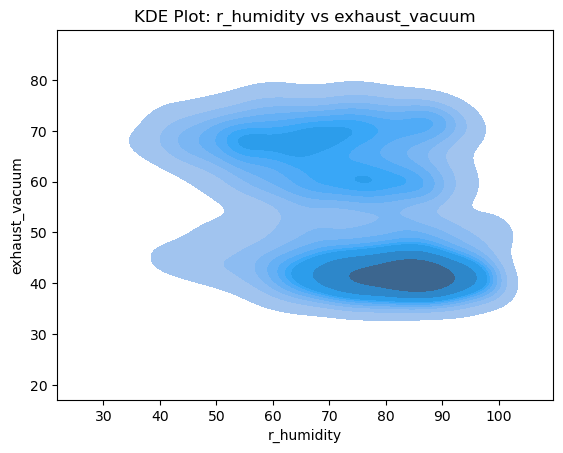

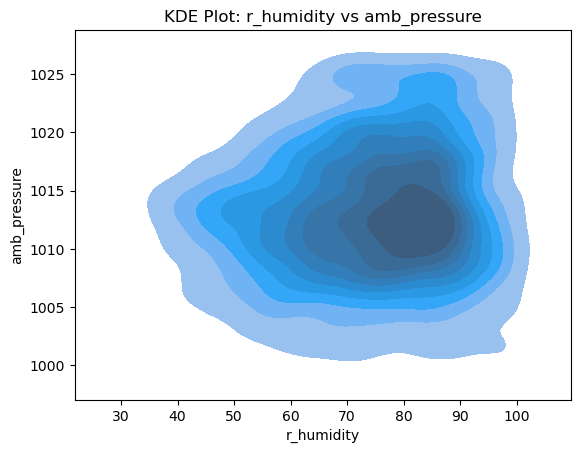

In [22]:
for i, col1 in enumerate(df.columns[:-1]):
    for j, col2 in enumerate(df.columns[:-1]):
        if i != j:
            sns.kdeplot(x=col1, y=col2, data=df, fill=True)
            plt.title(f"KDE Plot: {col1} vs {col2}")
            plt.show()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#assign the feature variable and target variable
y=df['energy_production']
y

0       481.30
1       465.36
2       465.48
3       467.05
4       463.58
         ...  
9563    457.32
9564    446.92
9565    429.34
9566    421.57
9567    454.41
Name: energy_production, Length: 9514, dtype: float64

In [39]:
x=df.drop('energy_production',axis=1)
x

,temperature,exhaust_vacuum,amb_pressure,r_humidity
0,9.59,38.56,1017.01,60.10
1,12.04,42.34,1019.72,94.67
2,13.87,45.08,1024.42,81.69
3,13.72,54.30,1017.89,79.08
4,15.14,49.64,1023.78,75.00
...,...,...,...,...
9563,17.10,49.69,1005.53,81.82
9564,24.73,65.34,1015.42,52.80
9565,30.44,56.24,1005.19,56.24
9566,23.00,66.05,1020.61,80.29


In [40]:
# standardize features
ss=StandardScaler()
ss_x=ss.fit_transform(x)

In [41]:
ss_x

array([[-1.35224231, -1.23972361,  0.67490435, -0.91546919],
       [-1.02274514, -0.94163873,  1.15157194,  1.46481671],
       [-0.77663092, -0.72556663,  1.97826483,  0.57109062],
       ...,
       [ 1.4518459 ,  0.15449348, -1.40414031, -1.18124598],
       [ 0.45125039,  0.92809471,  1.30811592,  0.47469489],
       [-0.25481498, -0.39672696,  1.35208894, -0.66966009]])

# Model evaluation

### 1)Linear Regression

In [44]:
rmse_test=[]# root mean square
rmse_train=[]
r2=[]# r_square
for i in range(100):
    #split the data into training and testing sets
    x_train,x_test,y_train,y_test=train_test_split(ss_x,y,test_size=0.30,random_state=i)
    
    #create and train the model
    linear_reg=LinearRegression()
    linear_reg.fit(x_train,y_train)
    
    # make predictions
    y_pred_test=linear_reg.predict(x_test)
    y_pred_train=linear_reg.predict(x_train)
    
    # Evaluate the model
    rmse_test.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
    rmse_train.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    r2.append(r2_score(y_test,y_pred_test))
    

In [45]:
print("average of rmse testing :",np.mean(rmse_test))
print("average of rmse training :",np.mean(rmse_train))
print("average of r^2 score :",np.mean(r2))

average of rmse testing : 4.560301318951278
average of rmse training : 4.557758062822111
average of r^2 score : 0.9282297279259919


In [46]:
# scatter plot

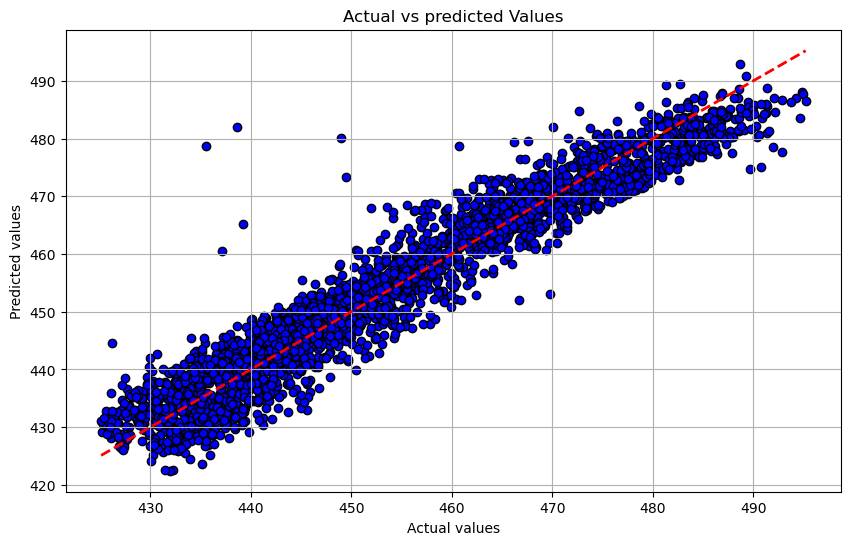

In [50]:
#create a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_test,color='blue',edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],linestyle='--',color='red',linewidth=2)
plt.title('Actual vs predicted Values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid(True)
plt.show()

### 2) Decisiontree Regressor

In [55]:
rmse_dtr=[]
r2_dtr=[]
for i in range(100):
    #split the data into training and testing sets
    x_train,x_test,y_train,y_test=train_test_split(ss_x,y,test_size=0.30,random_state=i)
    
    #create and train the model
    dtr_reg=DecisionTreeRegressor()
    dtr_reg.fit(x_train,y_train)
    
    # make predictions
    y_pred_dtr=dtr_reg.predict(x_test)
    
    # Evaluate the model
    rmse_dtr.append(np.sqrt(mean_squared_error(y_test,y_pred_dtr)))
    r2_dtr.append(r2_score(y_test,y_pred_dtr))

In [56]:
print('average rmse value of Decison tree regressor :',np.mean(rmse_dtr))
print('average r2_score value of Decison tree regressor :',np.mean(r2_dtr))

average rmse value of Decison tree regressor : 4.638257286834221
average r2_score value of Decison tree regressor : 0.9257076786601164


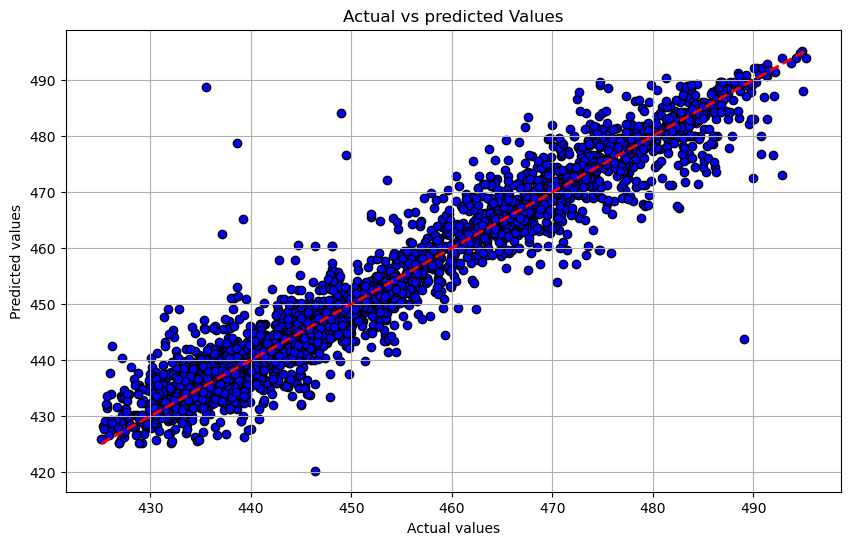

In [57]:
#create a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_dtr,color='blue',edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],linestyle='--',color='red',linewidth=2)
plt.title('Actual vs predicted Values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid(True)
plt.show()

### 3) Gradient Boosting Regressor

In [61]:
rmse_gb=[]
r2_gb=[]
for i in range(100):
    #split the data into training and testing sets
    x_train,x_test,y_train,y_test=train_test_split(ss_x,y,test_size=0.30,random_state=i)
    
    #create and train the model
    gb_reg=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_features=0.7)
    gb_reg.fit(x_train,y_train)
    
    # make predictions
    y_pred_gb=gb_reg.predict(x_test)
    
    # Evaluate the model
    rmse_gb.append(np.sqrt(mean_squared_error(y_test,y_pred_gb)))
    r2_gb.append(r2_score(y_test,y_pred_gb))

In [62]:
print('average rmse value of Gradient Boosting regressor :',np.mean(rmse_gb))
print('average r2_score value of Gradient Boosting regressor :',np.mean(r2_gb))

average rmse value of Gradient Boosting regressor : 3.9293904519460123
average r2_score value of Gradient Boosting regressor : 0.9467003210872454


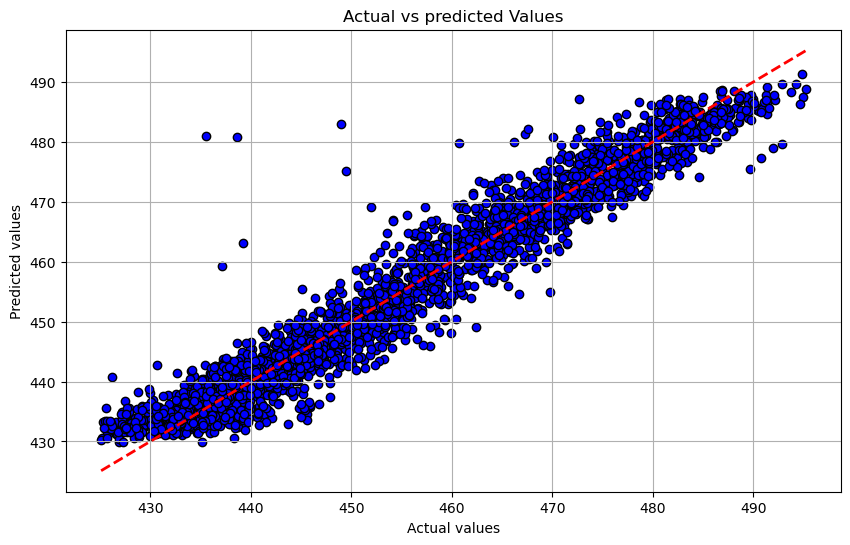

In [63]:
#create a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_gb,color='blue',edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],linestyle='--',color='red',linewidth=2)
plt.title('Actual vs predicted Values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid(True)
plt.show()

### 4)Support vector Regressor

In [64]:
rmse_svr=[]
r2_svr=[]
for i in range(100):
    #split the data into training and testing sets
    x_train,x_test,y_train,y_test=train_test_split(ss_x,y,test_size=0.30,random_state=i)
    
    #create and train the model
    svr_reg=SVR(kernel='linear')
    svr_reg.fit(x_train,y_train)
    
    # make predictions
    y_pred_svr=svr_reg.predict(x_test)
    
    # Evaluate the model
    rmse_svr.append(np.sqrt(mean_squared_error(y_test,y_pred_svr)))
    r2_svr.append(r2_score(y_test,y_pred_svr))

In [65]:
print('average rmse value of Support vector Regressor :',np.mean(rmse_svr))
print('average r2_score value of Support vector Regressor :',np.mean(r2_svr))

average rmse value of Support vector Regressor : 4.576229853482482
average r2_score value of Support vector Regressor : 0.9277256389150524


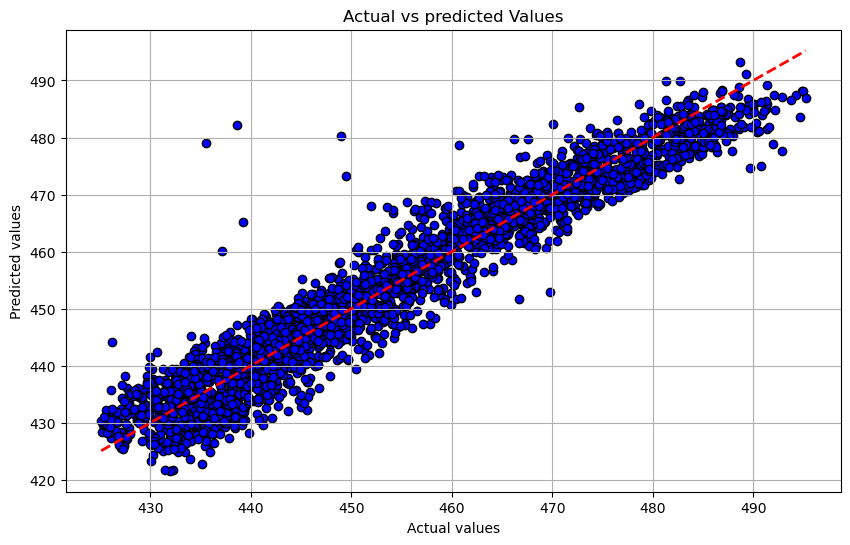

In [66]:
#create a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_svr,color='blue',edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],linestyle='--',color='red',linewidth=2)
plt.title('Actual vs predicted Values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid(True)
plt.show()

### 5) K-Nearest neighbor

In [67]:
from sklearn.model_selection import GridSearchCV

# Define a range og n_neighbours values to search
n_neighbours={'n_neighbors':[1,3,5,7,9,11]}

# Create the KNN regressor
knn_reg=KNeighborsRegressor()

# Perform grid search with cross-validation
grid_search=GridSearchCV(knn_reg,n_neighbours,cv=5)
grid_search.fit(x_train,y_train)

# Get the best n_neighbours value
best_n_neighbours=grid_search.best_params_['n_neighbors']

In [68]:
best_n_neighbours

5

In [70]:
rmse_knn=[]
r2_knn=[]
for i in range(100):
    #split the data into training and testing sets
    x_train,x_test,y_train,y_test=train_test_split(ss_x,y,test_size=0.30,random_state=i)
    
    #create and train the model
    knn_reg=KNeighborsRegressor(n_neighbors=5)
    knn_reg.fit(x_train,y_train)
    
    # make predictions
    y_pred_knn=knn_reg.predict(x_test)
    
    # Evaluate the model
    rmse_knn.append(np.sqrt(mean_squared_error(y_test,y_pred_knn)))
    r2_knn.append(r2_score(y_test,y_pred_knn))                

In [71]:
print('average rmse value of K-Nearest neighbor Regressor :',np.mean(rmse_knn))
print('average r2_score value of K-Nearest neighbor Regressor :',np.mean(r2_knn))

average rmse value of K-Nearest neighbor Regressor : 3.8672768980982486
average r2_score value of K-Nearest neighbor Regressor : 0.9483737791521599


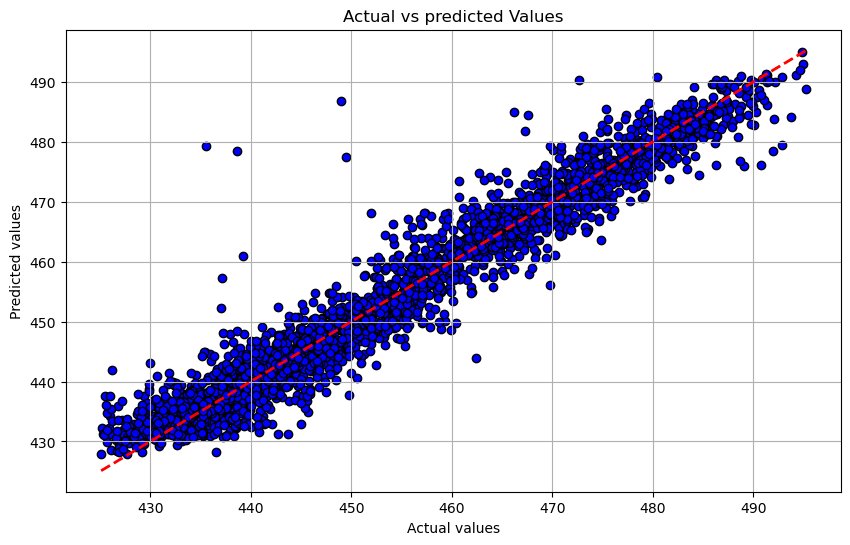

In [72]:
#create a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_knn,color='blue',edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],linestyle='--',color='red',linewidth=2)
plt.title('Actual vs predicted Values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid(True)
plt.show()

### 6) Random Forest Regressor

In [73]:
# list to store evaluation metrics
rmse_rf=[]
r2_rf=[]
for i in range(100):
    #split the data into training and testing sets
    x_train,x_test,y_train,y_test=train_test_split(ss_x,y,test_size=0.30,random_state=i)
    
    #create and train the model
    rfr=RandomForestRegressor(n_estimators=100,max_samples=0.6,max_features=0.7)
    rfr.fit(x_train,y_train)
    
    # make predictions
    y_pred_rf=rfr.predict(x_test)
    
    # Evaluate the model
    rmse_rf.append(np.sqrt(mean_squared_error(y_test,y_pred_rf)))
    r2_rf.append(r2_score(y_test,y_pred_rf))     

In [74]:
print('average rmse value of Random Forest :',np.mean(rmse_rf))
print('average r2_score value of Random Forest :',np.mean(r2_rf))

average rmse value of Random Forest : 3.36327107864244
average r2_score value of Random Forest : 0.9609361552817319


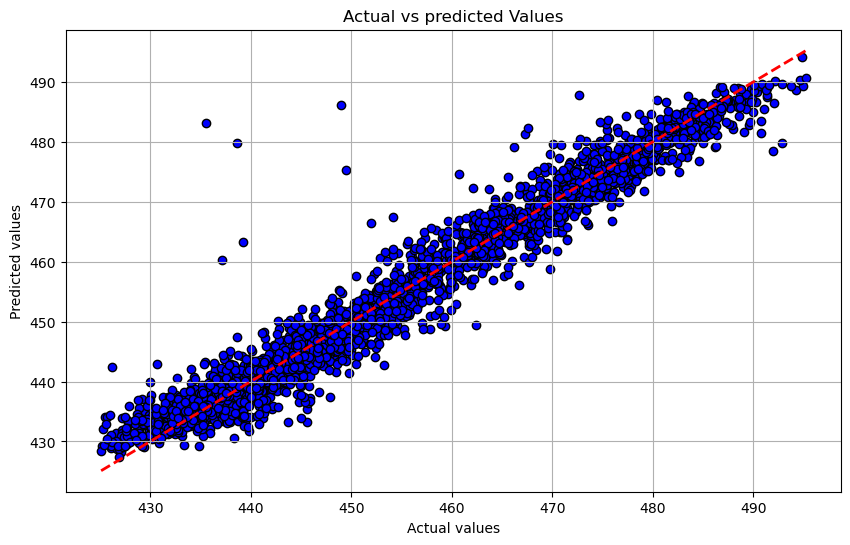

In [75]:
#create a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_rf,color='blue',edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],linestyle='--',color='red',linewidth=2)
plt.title('Actual vs predicted Values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid(True)
plt.show()

In [77]:
# tabulating the values

table={'**Model':pd.Series(['Linear Regression','Decision Tree Regression','Gradient Boosting Regression','Support vector Regression','K-Nearest neighbor Regression','Random Forest']),
      'Average RMSE':pd.Series([np.mean(rmse_test),np.mean(rmse_dtr),np.mean(rmse_gb),np.mean(rmse_svr),np.mean(rmse_knn),np.mean(rmse_rf)]),
       'Average R-squared**':pd.Series([np.mean(r2),np.mean(r2_dtr),np.mean(r2_gb),np.mean(r2_svr),np.mean(r2_knn),np.mean(r2_rf)])
     }
pd.DataFrame(table)

,**Model,Average RMSE,Average R-squared**
0,Linear Regression,4.560301,0.928230
1,Decision Tree Regression,4.638257,0.925708
2,Gradient Boosting Regression,3.929390,0.946700
3,Support vector Regression,4.576230,0.927726
4,K-Nearest neighbor Regression,3.867277,0.948374
5,Random Forest,3.363271,0.960936


In [78]:
Results=pd.DataFrame(table)
Results

,**Model,Average RMSE,Average R-squared**
0,Linear Regression,4.560301,0.928230
1,Decision Tree Regression,4.638257,0.925708
2,Gradient Boosting Regression,3.929390,0.946700
3,Support vector Regression,4.576230,0.927726
4,K-Nearest neighbor Regression,3.867277,0.948374
5,Random Forest,3.363271,0.960936


In [81]:
Results.sort_values(['Average RMSE','Average R-squared**'])

,**Model,Average RMSE,Average R-squared**
5,Random Forest,3.363271,0.960936
4,K-Nearest neighbor Regression,3.867277,0.948374
2,Gradient Boosting Regression,3.929390,0.946700
0,Linear Regression,4.560301,0.928230
3,Support vector Regression,4.576230,0.927726
1,Decision Tree Regression,4.638257,0.925708


In [82]:
# both the Random Forest and K-nearest neighbor models has slightly different r-squared value.So for the best model prediction
# we choose Random Forest regressor with more r-squared value and less average rmse value